This notebook presents the usage of VARNA API __hack mode__ to draw RNA 2.5D module with non-standard VARNA version ([commit a463cfe](https://github.com/anthonyhtyao/VARNA/commit/a463cfe912a1611072e89c5e6fce6fca413bd58f)).

In [1]:
import varnaapi

['java', '-cp', 'VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '              ', '-structureDBN', '..((......))..', '-o', '/tmp/tmp0qju2z86.png']


Output file: /tmp/tmp0qju2z86.png



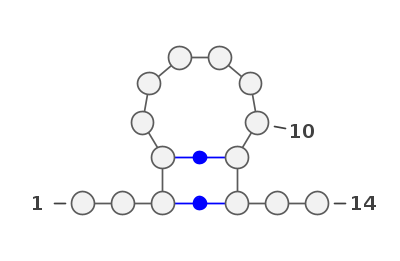

In [2]:
dbn = "..((......)).."
v = varnaapi.Structure(structure=dbn)
v.show()

Assume that the hairpin loop (4,11) above is a 2.D module containing a non-canonical basepair (5,9) with type `cSH`.
Let's try to draw it using `add_aux_BP` function.

['java', '-cp', 'VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '              ', '-structureDBN', '..((......))..', '-o', '/tmp/tmpkv106aji.png', '-auxBPs', '(5,9):edge5=s,edge3=h,color=#008000']


Output file: /tmp/tmpkv106aji.png



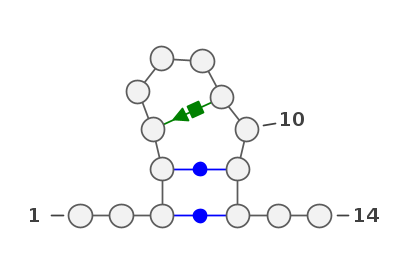

In [3]:
v = varnaapi.Structure(structure=dbn)
v.add_aux_BP(5,9, edge5="s", edge3="h", color='green')
v.show()

As we can see, the drawing is different than we would expect, the non-canonical basepair breaks the hairpin loop into two loops. This is because the standard VARNA (v3.93) will try to complete the secondary structure by adding as many non-crossing basepairs as possible from the auxiliary list. The non-standard VARNA version from commit a463cfe allows us to keep bases in the original positions while adding the auxiliary basepairs with option `keep`. However, the `keep` option cannot pass the syntax check in normal mode.

In [4]:
v = varnaapi.Structure(structure=dbn)
v.add_aux_BP(5,9, edge5="s", edge3="h", color='green', keep=True)
v.show()

TypeError: keep is not a valid keyword

In order to use the non-standard version, VARNA API requires to turn on the hack mode, which will turn off most of the checks and allow us to pass additional options

In [5]:
varnaapi.param.enable_hack()

Then, we set the path to the hacked version and draw the structure again

['java', '-cp', 'VARNA-module.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '              ', '-structureDBN', '..((......))..', '-o', '/tmp/tmpm6screne.png', '-auxBPs', '(5,9):edge5=s,edge3=h,color=#008000,keep=True']


Output file: /tmp/tmpm6screne.png



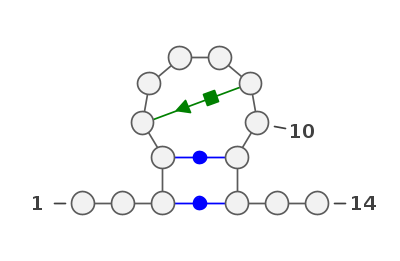

In [6]:
varnaapi.set_VARNA('VARNA-module.jar')
v = varnaapi.Structure(structure=dbn)
v.add_aux_BP(5,9, edge5="s", edge3="h", color='green', keep=True)
v.show()

We can also set the command line option `-keepAuxBPs` to `True` if we want to keep all basepairs in auxiliary list as non-canonical.

['java', '-cp', 'VARNA-module.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '              ', '-structureDBN', '..((......))..', '-o', '/tmp/tmp4okg2oyl.png', '-keepAuxBPs', 'True', '-auxBPs', '(5,9):edge5=s,edge3=h,color=#008000;(6,8):edge3=h,color=#ff0000']


Output file: /tmp/tmp4okg2oyl.png



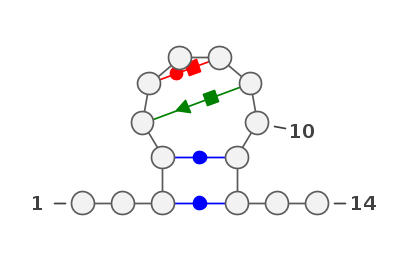

In [7]:
v = varnaapi.Structure(structure=dbn)
v.add_aux_BP(5, 9, edge5="s", edge3="h", color='green')
v.add_aux_BP(6, 8, edge5="wc", edge3="h", color='red')
v.update(keepAuxBPs=True)
v.show()